In [13]:
import os
import pandas as pd
import matplotlib.pyplot as plt


# # https://www.countyofsb.org/2328/Daily-Rainfall-Data-XLS
# fp = os.path.join('data', '440dailys.xls')
# df = pd.read_excel(fp)
# df.head(5)

In [2]:
# Find the average duration per decade.

fp = os.path.join('data', 'hf071-01-hurricanes.csv')
df = pd.read_csv(fp)
df.head()

,code,start.date,end.date,number,name,ss,track,rf.max
0,Y1852,1852-10-07,1852-10-08,5,NaN,2,O,F1
1,Y1857,1857-09-28,1857-09-28,4,NaN,2,N,F1
2,Y1861,1861-08-17,1861-08-17,2,NaN,1,O,Nd
3,Y1864,1864-08-31,1864-08-31,3,NaN,1,S,F1
4,Y1865,1865-09-11,1865-09-11,4,NaN,2,O,F1


In [3]:
df.dtypes

code          object
start.date    object
end.date      object
number         int64
name          object
ss             int64
track         object
rf.max        object
dtype: object

In [4]:
df['start.date'] = pd.to_datetime(df['start.date'])
df['start.date']

0     1852-10-07
1     1857-09-28
2     1861-08-17
3     1864-08-31
4     1865-09-11
         ...    
100   1995-10-01
101   1995-10-10
102   1996-08-20
103   1998-10-27
104   2000-10-01
Name: start.date, Length: 105, dtype: datetime64[ns]

In [5]:
df['end.date'] = pd.to_datetime(df['end.date'])
df['end.date']

0     1852-10-08
1     1857-09-28
2     1861-08-17
3     1864-08-31
4     1865-09-11
         ...    
100   1995-10-03
101   1995-10-16
102   1996-08-20
103   1998-10-28
104   2000-10-03
Name: end.date, Length: 105, dtype: datetime64[ns]

In [6]:
df.dtypes

code                  object
start.date    datetime64[ns]
end.date      datetime64[ns]
number                 int64
name                  object
ss                     int64
track                 object
rf.max                object
dtype: object

In [7]:
df['duration']= df['end.date'] - df['start.date']

In [8]:
df

,code,start.date,end.date,number,name,ss,track,rf.max,duration
0,Y1852,1852-10-07,1852-10-08,5,NaN,2,O,F1,1 days
1,Y1857,1857-09-28,1857-09-28,4,NaN,2,N,F1,0 days
2,Y1861,1861-08-17,1861-08-17,2,NaN,1,O,Nd,0 days
3,Y1864,1864-08-31,1864-08-31,3,NaN,1,S,F1,0 days
4,Y1865,1865-09-11,1865-09-11,4,NaN,2,O,F1,0 days
...,...,...,...,...,...,...,...,...,...
100,Y1995a,1995-10-01,1995-10-03,15,Opal,1,N*,F0,2 days
101,Y1995b,1995-10-10,1995-10-16,17,Roxanne,3,N,F2,6 days
102,Y1996,1996-08-20,1996-08-20,4,Dolly,1,N,F1,0 days
103,Y1998,1998-10-27,1998-10-28,13,Mitch,5,S,F1,1 days


In [9]:
df[(df['rf.max'] == 'F3') | (df['rf.max'] == 'F4') | (df['rf.max'] == 'F5')]

,code,start.date,end.date,number,name,ss,track,rf.max,duration
76,Y1955b,1955-09-28,1955-09-28,10,Janet,5,N,F3,0 days
93,Y1974a,1974-09-02,1974-09-06,6,Carmen,4,N,F3,4 days
96,Y1980a,1980-08-07,1980-08-08,1,Allen,5,O,F3,1 days
98,Y1988,1988-09-14,1988-09-15,8,Gilbert,5,N,F3,1 days


In [10]:
df.groupby('rf.max').size()

rf.max
F0    29
F1    41
F2    17
F3     4
Nd    14
dtype: int64

In [11]:
df.duration.idxmax()

101

In [12]:
df.loc[df.duration.idxmax()]

code                       Y1995b
start.date    1995-10-10 00:00:00
end.date      1995-10-16 00:00:00
number                         17
name                      Roxanne
ss                              3
track                           N
rf.max                         F2
duration          6 days 00:00:00
Name: 101, dtype: object

What was the duration of the hurricanes with highest Saffir-Simpson category in the dataset?

1. Preliminary analysis
2. Make a high-level plan with your team. Write steps and intermediate wrangling do will need to do to obtain this information.
3. Apply your plan

<function matplotlib.pyplot.show(close=None, block=None)>

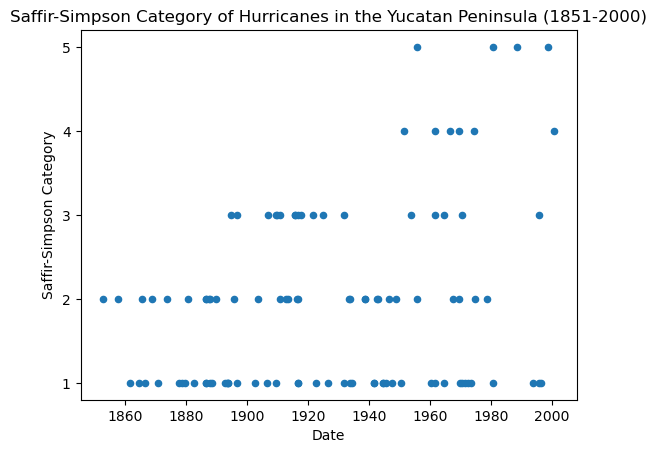

In [20]:
# Initialize empty figure
fig, ax = plt.subplots()

df.plot(ax=ax,
        x='start.date',
        y='ss',
        kind='scatter', 
        alpha=0.5 )

ax.set_title('')
ax.set_yticks([1,2,3,4,5])  # note that we don't need to specify labels
ax.set_ylabel('Saffir-Simpson Category')
ax.set_xlabel('Date')

ax.set_title('Saffir-Simpson Category of Hurricanes in the Yucatan Peninsula (1851-2000)')

plt.show